In [2]:
!pip install fastcluster

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import fastcluster

from sklearn.datasets import make_blobs

In [5]:
#Import data
df = pd.read_excel("DentMax Case Dataset(1).xlsx")

#Drop empty column
df.drop(columns="Unnamed: 0",inplace=True)
df.set_index('Observations / Segmentation Variables',inplace=True)

#Standardization of the original dataframe
x = df.values
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

#Creation of the new dataframe using standardized values
data = pd.DataFrame(scaled,columns=df.columns.values).rename_axis('Observations / Segmentation Variables')

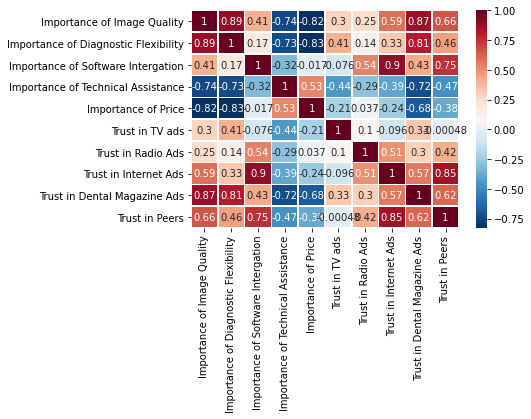

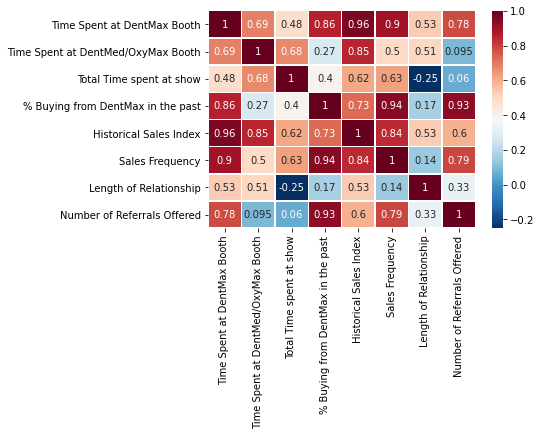

In [7]:
##Based on the teacher's feedback, the selection of the attributes is the most transparent method##

df_perceptual = data[['Importance of Image Quality','Importance of Diagnostic Flexibility','Importance of Software Intergation','Importance of Technical Assistance','Importance of Price','Trust in TV ads','Trust in Radio Ads','Trust in Internet Ads','Trust in Dental Magazine Ads','Trust in Peers']]
pearson = df_perceptual.corr(method='pearson')

df_behavioral = data[['Time Spent at DentMax Booth','Time Spent at DentMed/OxyMax Booth','Total Time spent at show','% Buying from DentMax in the past','Historical Sales Index','Sales Frequency','Length of Relationship','Number of Referrals Offered']]
pearson1 = df_behavioral.corr(method='pearson')

#First look at the descriptive statistic (mean) of the dataset (non standardized) to detect the most important attributes
x = pd.DataFrame(df[df_perceptual.columns].mean())
x.sort_values(by=0)
#The top Perceptual attributes
  #Importance of Image Quality	5.257826
  #Trust in Dental Magazine Ads	5.352609
  #Trust in Peers	5.940870
  #Importance of Technical Assistance	6.134348
  #Importance of Price	6.408696

y = pd.DataFrame(df[df_behavioral.columns].mean())
y.sort_values(by=0)

#The top Behavioral attributes (with standardized values)
  #Time Spent at DentMax Booth	1.392123e-16
  #Sales Frequency	1.395502e-16
  #Historical Sales Index	1.883517e-16
  #Time Spent at DentMed/OxyMax Booth	2.581027e-16
  #Number of Referrals Offered	3.330910e-16

#Then compute the correlation coefficeint to filter variable that we assume as similar : two dimensions perceptual and behavioral
df_perceptual = data[['Importance of Image Quality','Importance of Diagnostic Flexibility','Importance of Software Intergation','Importance of Technical Assistance','Importance of Price','Trust in TV ads','Trust in Radio Ads','Trust in Internet Ads','Trust in Dental Magazine Ads','Trust in Peers']]
pearson = df_perceptual.corr(method='pearson')

sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

plt.show()

df_behavioral = data[['Time Spent at DentMax Booth','Time Spent at DentMed/OxyMax Booth','Total Time spent at show','% Buying from DentMax in the past','Historical Sales Index','Sales Frequency','Length of Relationship','Number of Referrals Offered']]
pearson1 = df_behavioral.corr(method='pearson')

sns.heatmap(pearson1, 
            xticklabels=pearson1.columns,
            yticklabels=pearson1.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

#Selection of the attributes (Based on the pearsonr tables) = If some attributes are strongly correlated we keep only one
df_selected_p = df_perceptual[['Importance of Price','Importance of Technical Assistance','Trust in Peers','Importance of Image Quality']]
df_selected_b = df_behavioral[['Number of Referrals Offered','Historical Sales Index']]

#Concat the final dataframe with the selected features
list_final_df = [df_selected_p,df_selected_b]
final_df = pd.concat(list_final_df, axis=1)

In [8]:
#Creation of the KMeans clustering method and hyperparameter tunning
parameters = {'n_clusters':np.arange(1,5)}
kmeans_selected = KMeans()
kmeans_selected_cv = GridSearchCV(kmeans_selected,param_grid=parameters,cv=3)

#Perform the KMeans clustering and determining the best n_cluster
kmeans_selected_cv.fit(final_df)
print(kmeans_selected_cv.best_params_)

#Determine KMeans with n_cluster accoridng to last results
km_ = KMeans(n_clusters=4,random_state=10)
km_.fit(final_df)
clusters = km_.predict(final_df)
clusters = clusters.reshape(-1,1)

#Identification of centroids
centers_final = np.array(km_.cluster_centers_)

#Creation of the final dataframe with clusters
df_final_cluster = final_df.copy()
df_final_cluster['Cluster'] = clusters

{'n_clusters': 4}


/Users/elainelim/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/elainelim/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/elainelim/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/elainelim/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/elainelim/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/ela

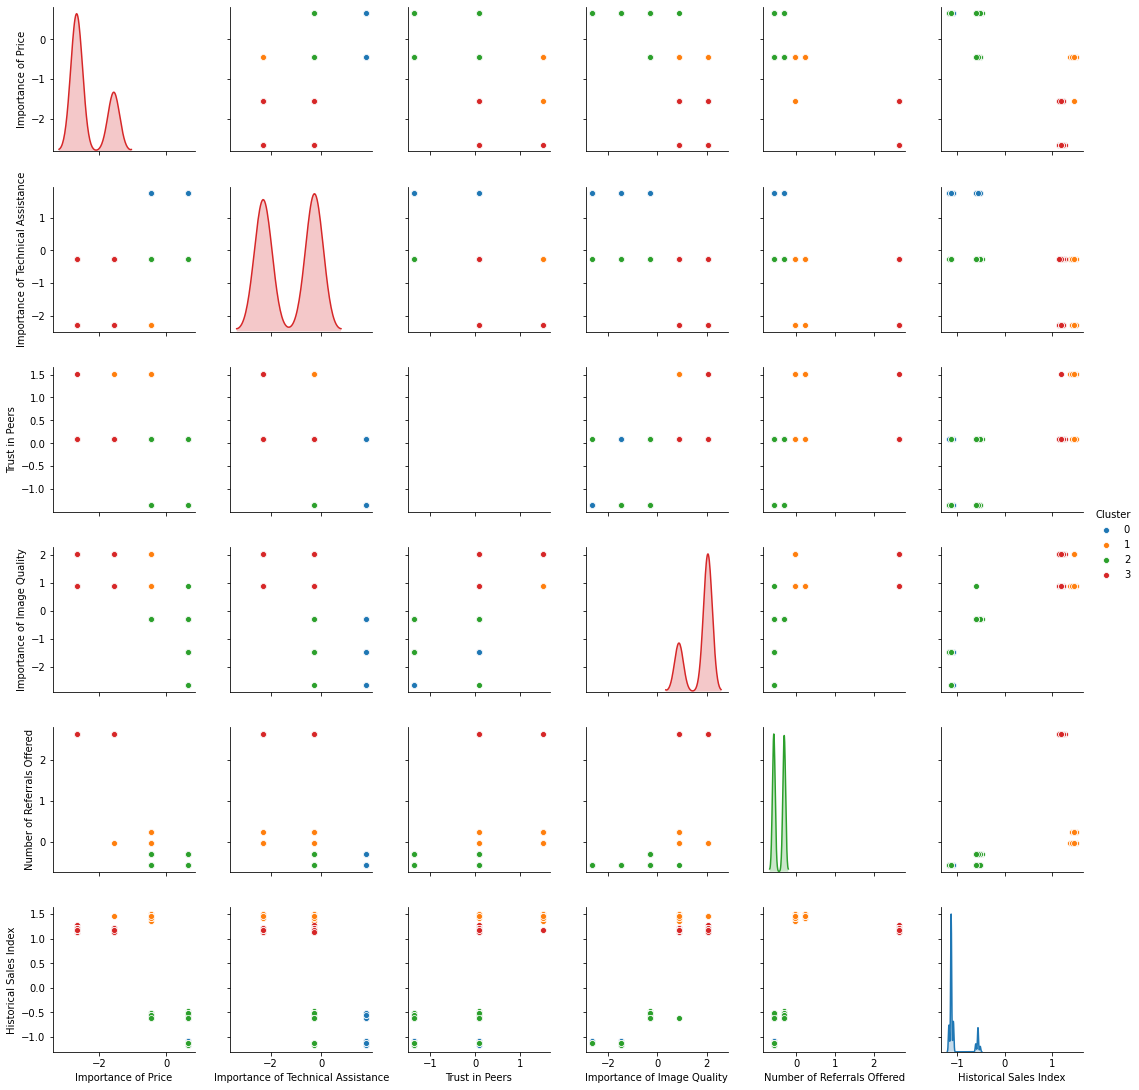

In [9]:
#Plot KMeans cluster - With pariplot (Scatters)
sns.pairplot(df_final_cluster,hue='Cluster')
plt.show()

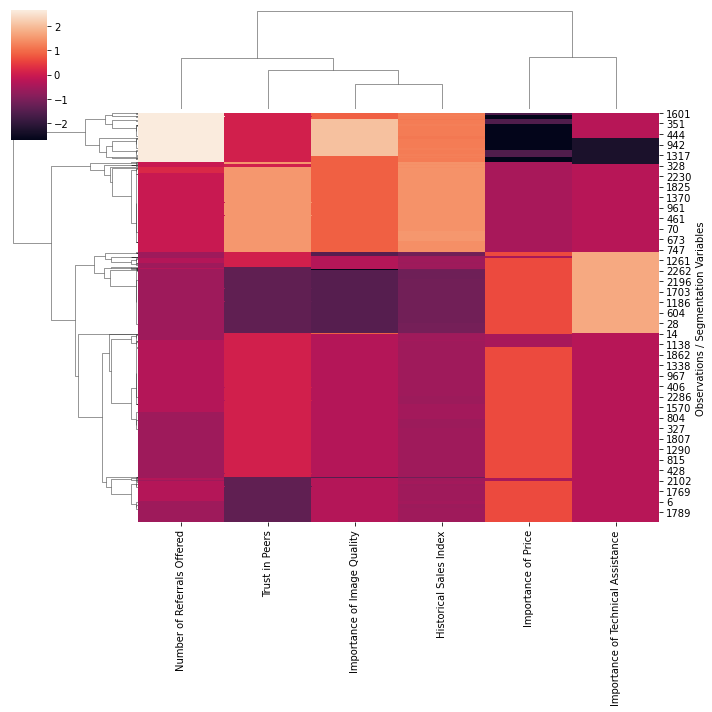

In [10]:
#Plot Hierarchical clustering - With clustermap
sns.clustermap(final_df)
plt.show()